# created by - Sanjana Pal

## Customer Segmentation concepts

### Context
This data set is created only for the learning purpose of the customer segmentation concepts , also known as market basket analysis . I will demonstrate this by using unsupervised ML technique (KMeans Clustering Algorithm) in the simplest form.

### Content
You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.
Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

### Problem Statement
You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
9%matplotlib inline

In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# EDA

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


<AxesSubplot:>

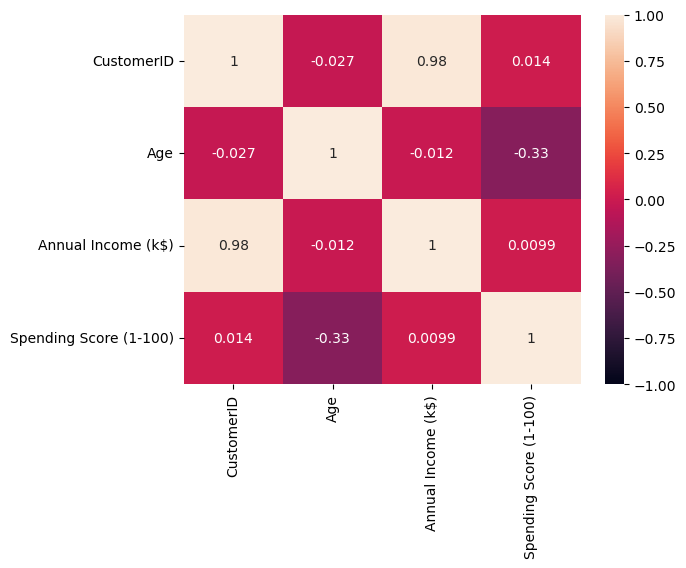

In [8]:
sns.heatmap(df.corr(),vmin=-1,vmax=1,annot=True)

In [18]:
 df.rename(columns={'Annual Income (k$)':'annual_income','Spending Score (1-100)':'spending_score','Genre':'Gender'},inplace=True)

In [19]:
df.head()

,CustomerID,Gender,Age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [21]:
df = pd.get_dummies(df,columns=['Gender'])

In [22]:
df.head()

,CustomerID,Age,annual_income,spending_score,Gender_Female,Gender_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0


<AxesSubplot:>

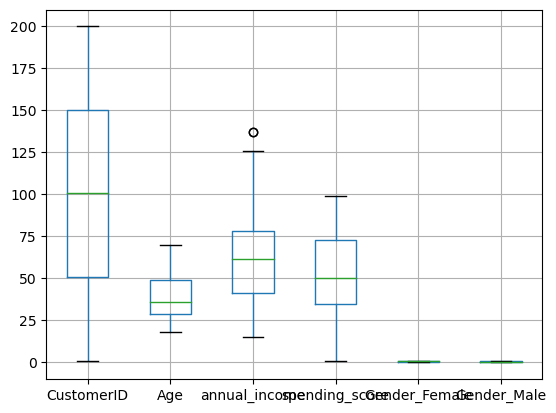

In [26]:
df.boxplot()

# Feature scaling

In [30]:
sc = StandardScaler()
x = sc.fit_transform(df)
x

array([[-1.7234121 , -1.42456879, -1.73899919, -0.43480148, -1.12815215,
         1.12815215],
       [-1.70609137, -1.28103541, -1.73899919,  1.19570407, -1.12815215,
         1.12815215],
       [-1.68877065, -1.3528021 , -1.70082976, -1.71591298,  0.88640526,
        -0.88640526],
       ...,
       [ 1.68877065, -0.49160182,  2.49780745,  0.92395314, -1.12815215,
         1.12815215],
       [ 1.70609137, -0.49160182,  2.91767117, -1.25005425, -1.12815215,
         1.12815215],
       [ 1.7234121 , -0.6351352 ,  2.91767117,  1.27334719, -1.12815215,
         1.12815215]])

# Model Building

In [32]:
km = KMeans()
y = km.fit_predict(x)
y

array([3, 3, 0, 0, 0, 0, 0, 0, 5, 0, 5, 0, 4, 0, 3, 3, 0, 3, 5, 0, 3, 3,
       4, 3, 4, 3, 4, 3, 4, 0, 5, 0, 5, 3, 4, 0, 4, 0, 0, 0, 4, 3, 5, 0,
       4, 0, 4, 0, 0, 0, 4, 3, 0, 5, 4, 5, 4, 5, 0, 5, 5, 3, 4, 4, 5, 3,
       4, 4, 3, 0, 5, 4, 4, 4, 5, 3, 4, 3, 0, 4, 5, 3, 5, 4, 0, 5, 4, 0,
       0, 4, 4, 3, 5, 4, 0, 3, 4, 0, 5, 3, 0, 4, 5, 3, 5, 0, 4, 5, 5, 5,
       5, 0, 7, 3, 0, 0, 4, 4, 4, 4, 6, 7, 2, 6, 7, 2, 1, 6, 1, 6, 1, 6,
       7, 2, 1, 2, 7, 6, 1, 2, 7, 6, 7, 2, 1, 6, 1, 2, 7, 6, 1, 6, 7, 2,
       7, 2, 1, 2, 1, 2, 7, 2, 1, 2, 1, 2, 1, 2, 7, 6, 1, 6, 1, 6, 7, 2,
       1, 6, 1, 6, 7, 2, 1, 2, 7, 6, 7, 6, 7, 2, 7, 2, 1, 2, 7, 2, 7, 6,
       1, 6])

it is showing there is 8 cluster

In [34]:
km.cluster_centers_

array([[-0.86314944, -0.8843251 , -0.8282342 ,  0.26722174,  0.88640526,
        -0.88640526],
       [ 1.02192275,  0.04664835,  0.93858626, -1.40339942, -1.12815215,
         1.12815215],
       [ 1.0565642 , -0.45245636,  0.94327069,  1.17982252,  0.88640526,
        -0.88640526],
       [-0.84582872, -0.94612419, -0.81180014,  0.34648243, -1.12815215,
         1.12815215],
       [-0.54407453,  0.95850746, -0.48502118, -0.31148593,  0.88640526,
        -0.88640526],
       [-0.53936736,  1.43461613, -0.48704192, -0.35715836, -1.12815215,
         1.12815215],
       [ 1.00232298, -0.42361233,  0.9730392 ,  1.20592027, -1.12815215,
         1.12815215],
       [ 1.03144915,  0.15788672,  0.99774888, -0.96083363,  0.88640526,
        -0.88640526]])

In [35]:
silhouette_score(x,y)

0.40728713066796474

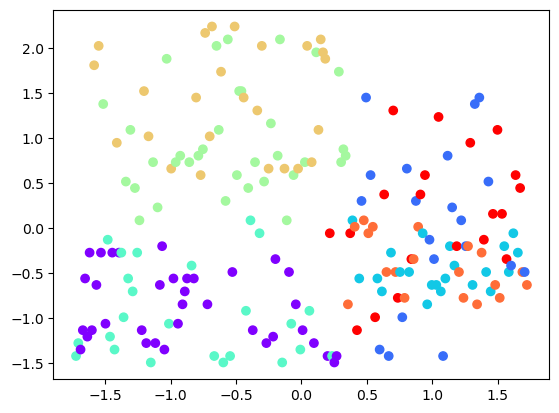

In [41]:
plt.scatter(x[:,0],x[:,1],c=y,cmap='rainbow')

for exact no of cluster we are going to find wcss value i.e variation and inertia

In [37]:
wcss=[]

for i in range(1,20):
    km = KMeans(n_clusters=i)
    ypred = km.fit_predict(x)
    wcss.append(km.inertia_)

In [38]:
wcss

[1200.0,
 797.2883426603587,
 638.6589248711803,
 510.80704351085956,
 435.3944349804206,
 369.15815399013246,
 304.3299739984462,
 254.4152172935256,
 222.69085188013756,
 191.37365582186786,
 170.42665844265,
 152.03924630429066,
 144.7390487269986,
 132.59750572437457,
 126.80728333773783,
 120.62520833675012,
 113.301915347593,
 104.07642671013863,
 97.89097276354207]

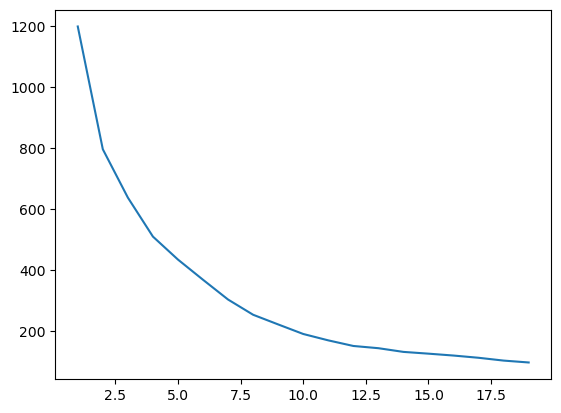

In [42]:
plt.plot(range(1,20),wcss)

In [43]:
km = KMeans(n_clusters=8)
ypred = km.fit_predict(x)
ypred

array([2, 2, 4, 4, 4, 4, 4, 4, 0, 4, 0, 4, 7, 4, 0, 2, 4, 2, 0, 4, 2, 2,
       7, 2, 7, 2, 7, 2, 7, 4, 0, 4, 0, 2, 7, 4, 7, 4, 4, 4, 7, 2, 0, 4,
       7, 4, 7, 4, 4, 4, 7, 2, 4, 0, 7, 0, 7, 0, 4, 0, 0, 2, 7, 7, 0, 2,
       7, 7, 2, 4, 0, 7, 7, 7, 0, 2, 7, 2, 4, 7, 0, 2, 0, 7, 4, 0, 7, 4,
       4, 7, 7, 2, 0, 7, 4, 2, 7, 4, 0, 2, 4, 7, 0, 2, 0, 4, 7, 0, 0, 0,
       0, 4, 7, 2, 4, 4, 7, 7, 7, 7, 2, 6, 1, 5, 6, 1, 3, 5, 3, 5, 3, 5,
       6, 1, 3, 1, 6, 5, 3, 1, 6, 5, 6, 1, 3, 5, 3, 1, 6, 5, 3, 5, 6, 1,
       6, 1, 3, 1, 3, 1, 6, 1, 3, 1, 3, 1, 3, 1, 6, 5, 3, 5, 3, 5, 6, 1,
       3, 5, 3, 5, 6, 1, 3, 1, 6, 5, 6, 5, 6, 1, 6, 1, 3, 1, 6, 1, 6, 5,
       3, 5])

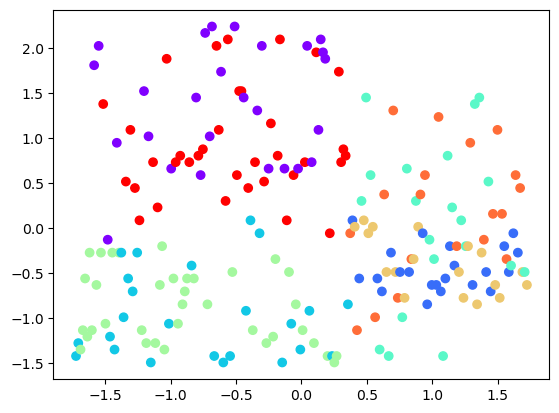

In [44]:
plt.scatter(x[:,0],x[:,1],c=ypred,cmap='rainbow')


In [45]:
silhouette_score(x,ypred)

0.40848017417967

In [46]:
km.cluster_centers_

array([[-0.575581  ,  1.37433211, -0.52785384, -0.39896619, -1.12815215,
         1.12815215],
       [ 1.0565642 , -0.45245636,  0.94327069,  1.17982252,  0.88640526,
        -0.88640526],
       [-0.76932885, -0.97602698, -0.73705168,  0.41603773, -1.12815215,
         1.12815215],
       [ 1.02192275,  0.04664835,  0.93858626, -1.40339942, -1.12815215,
         1.12815215],
       [-0.86314944, -0.8843251 , -0.8282342 ,  0.26722174,  0.88640526,
        -0.88640526],
       [ 1.03828121, -0.39989994,  1.01344075,  1.26040667, -1.12815215,
         1.12815215],
       [ 1.07434073,  0.16940716,  1.0433513 , -0.99464925,  0.88640526,
        -0.88640526],
       [-0.52234357,  0.92937863, -0.46741192, -0.31168167,  0.88640526,
        -0.88640526]])

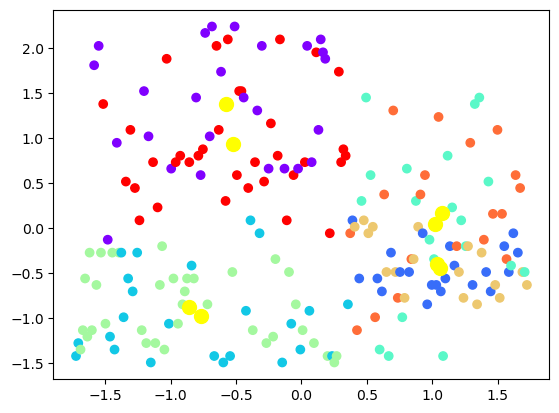

In [48]:
plt.scatter(x[:,0],x[:,1],c=ypred,cmap='rainbow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color = 'yellow',s=100)

In [49]:
! pip install yellowbrick

In [54]:
from yellowbrick.cluster import SilhouetteVisualizer

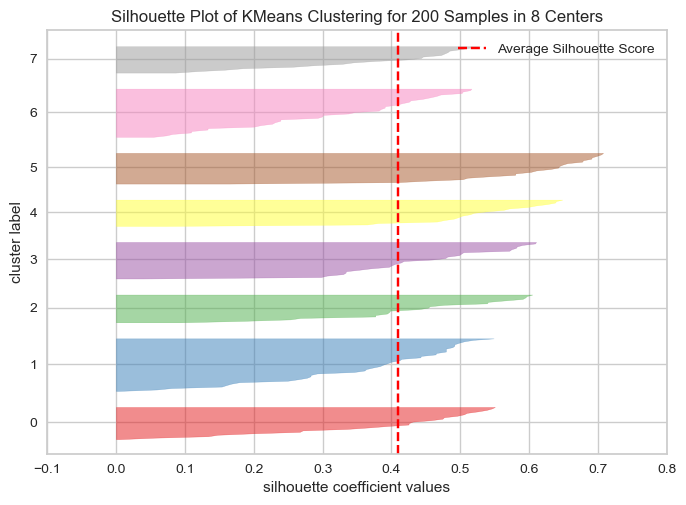

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 200 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [55]:
model = SilhouetteVisualizer(KMeans(n_clusters=8))
vis = model.fit(x)
vis.show()

In [56]:
sil_score=[]

for i in range(2,20):
    km = KMeans(n_clusters=i)
    km.fit_predict(x)
    sil_score.append(silhouette_score(x,y))

In [57]:
sil_score

[0.40728713066796474,
 0.40728713066796474,
 0.40728713066796474,
 0.40728713066796474,
 0.40728713066796474,
 0.40728713066796474,
 0.40728713066796474,
 0.40728713066796474,
 0.40728713066796474,
 0.40728713066796474,
 0.40728713066796474,
 0.40728713066796474,
 0.40728713066796474,
 0.40728713066796474,
 0.40728713066796474,
 0.40728713066796474,
 0.40728713066796474,
 0.40728713066796474]

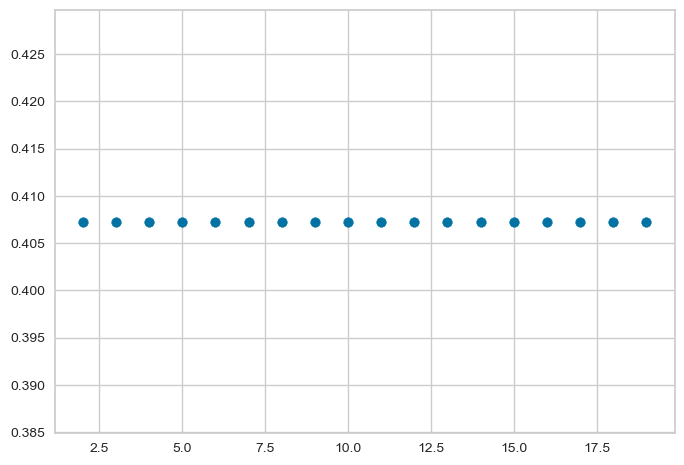

In [58]:
plt.scatter(range(2,20),sil_score)

In [59]:
silhouette_score(x,y)

0.40728713066796474

in wcss sihouette_score accuracy is 0.40848017417967 and after finding sil_score accuracy is 0.40728713066796474 os it is better to used wcss only.